# **Exploratory Data Analysis - MuReD (COSC 189)**

### Will Romano, Timothy Yang, Tate Toussaint, Scott Dayton

#### *Fall 2022*

In this notebook we will be exploring the MuReD dataset. We characterize the kinds of data, relationships between variables, and potential issues that we'll need to clean up at a later stage.

Data obtained from [IEEE Dataport](https://ieee-dataport.org/documents/multi-label-retinal-disease-mured-dataset) and the [dataset paper](https://arxiv.org/abs/2207.02335).

## Loading Data and Basic Info

We can see that the dataset is not terribly large with only just over 2000 records.

The column names are not particularly descriptive so here is a table with their definitions provided by the MuReD paper:

| Acronym | Full Name                        |
|---------|----------------------------------|
| DR      | Diabetic Retinopathy             |
| NORMAL  | Normal Retina                    |
| MH      | Media Haze                       |
| ODC     | Optic Disc Cupping               |
| TSLN    | Tessellation                     |
| ARMD    | Age-Related Macular Degeneration |
| DN      | Drusen                           |
| MYA     | Myopia                           |
| BRVO    | Branch Retinal Vein Occlusion    |
| ODP     | Optic Disc Pallor                |
| CRVO    | Central Retinal Vein Oclussion   |
| CNV     | Choroidal Neovascularization     |
| RS      | Retinitis                        |
| ODE     | Optic Disc Edema                 |
| LS      | Laser Scars                      |
| CSR     | Central Serous Retinopathy       |
| HTR     | Hypertensive Retinopathy         |
| ASR     | Arteriosclerotic Retinopathy     |
| CRS     | Chorioretinitis                  |
| OTHER   | Other Diseases                   |

We can also see that the `.csv` files consists purely of values of 0 or 1 to indicate which labels were assigned to each file. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import figure
from IPython.display import Markdown, display
from PIL import Image
from google.colab import drive
import os
from tensorflow.keras.preprocessing import image

sns.set_context("notebook", font_scale=2)
sns.set_style("ticks")
sns.set(rc={"figure.figsize": (12, 9)})

def printmd(string, color="DodgerBlue"):
    """Formats a string in markdown format to display font weights and colors in outputs."""
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))

In [2]:
# load in data
drive.mount('/content/drive')
train = pd.read_csv("/content/drive/Shareddrives/COSC 189/COSC 189 Project/Raw Data/train_data.csv")
val = pd.read_csv("/content/drive/Shareddrives/COSC 189/COSC 189 Project/Raw Data/val_data.csv")

df = pd.concat([train, val], ignore_index=True)

# basic description
printmd("**The shape of the whole MuReD dataset:**")
display(df.shape)
print("")
printmd("**Which has the split of train/validation of**")
print(f"Train split shape: {train.shape}\tTest split shape:{val.shape}")
print(f"for a validation ratio of {'{:.2%}'.format(val.shape[0] / df.shape[0])}\n")
printmd("**The columns are:**")
display(df.columns)
print("")
printmd("**The value counts of each column:**")
display(df.loc[:, df.columns != "ID"].apply(pd.Series.value_counts))
print("")
printmd("**The description of the dataset's columns:**")
display(df.describe())
print("")
printmd("**And the first and last records are:**")
display(df)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<span style='color:DodgerBlue'>**The shape of the whole MuReD dataset:**</span>

(2208, 21)

<span style='color:DodgerBlue'>**Which has the split of train/validation of**</span>

Train split shape: (1764, 21)	Test split shape:(444, 21)
for a validation ratio of 20.11%



<span style='color:DodgerBlue'>**The columns are:**</span>

Index(['ID', 'DR', 'NORMAL', 'MH', 'ODC', 'TSLN', 'ARMD', 'DN', 'MYA', 'BRVO',
       'ODP', 'CRVO', 'CNV', 'RS', 'ODE', 'LS', 'CSR', 'HTR', 'ASR', 'CRS',
       'OTHER'],
      dtype='object')

<span style='color:DodgerBlue'>**The value counts of each column:**</span>

,DR,NORMAL,MH,ODC,TSLN,ARMD,DN,MYA,BRVO,ODP,CRVO,CNV,RS,ODE,LS,CSR,HTR,ASR,CRS,OTHER
0,1713,1715,2039,1945,2052,2050,2046,2119,2129,2146,2153,2148,2150,2151,2162,2172,2173,2175,2178,1947
1,495,493,169,263,156,158,162,89,79,62,55,60,58,57,46,36,35,33,30,261


<span style='color:DodgerBlue'>**The description of the dataset's columns:**</span>

,DR,NORMAL,MH,ODC,TSLN,ARMD,DN,MYA,BRVO,ODP,CRVO,CNV,RS,ODE,LS,CSR,HTR,ASR,CRS,OTHER
count,2208.000000,2208.000000,2208.00000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000
mean,0.224185,0.223279,0.07654,0.119112,0.070652,0.071558,0.073370,0.040308,0.035779,0.028080,0.024909,0.027174,0.026268,0.025815,0.020833,0.016304,0.015851,0.014946,0.013587,0.118207
std,0.417139,0.416538,0.26592,0.323994,0.256301,0.257813,0.260801,0.196725,0.185781,0.165238,0.155884,0.162627,0.159968,0.158620,0.142858,0.126672,0.124929,0.121363,0.115795,0.322926
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<span style='color:DodgerBlue'>**And the first and last records are:**</span>

,ID,DR,NORMAL,MH,ODC,TSLN,ARMD,DN,MYA,BRVO,...,CRVO,CNV,RS,ODE,LS,CSR,HTR,ASR,CRS,OTHER
0,aria_c_25_1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,aria_c_7_2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,aria_c_38_2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,aria_c_2_8,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,aria_c_26_15,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,im0373,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2204,im0377,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2205,im0397,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2206,im0399,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


## Missing Data

There isn't any missing data in this dataset (the paper mentions extensive cleaning). This doesn't necessarily mean that there isn't less explicit missing information (such as misslabeled images), just that there are no NaN values. 

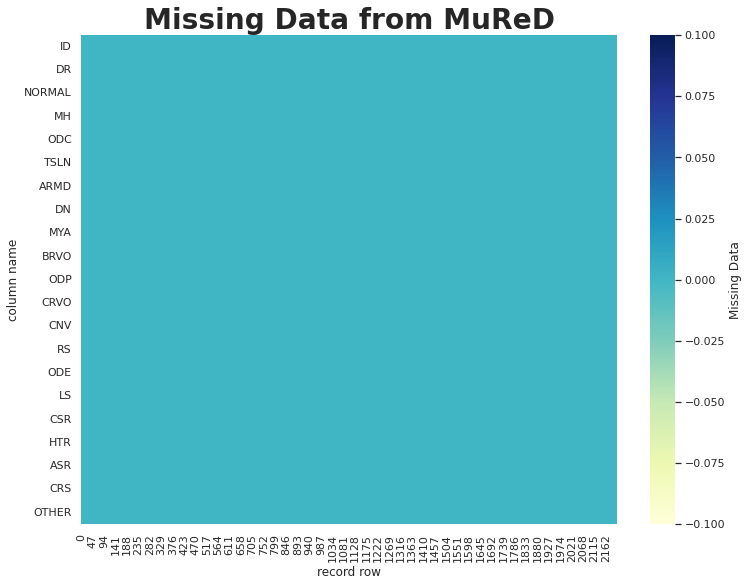

In [3]:
# missing values
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot()
sns.heatmap(df.isna().transpose(), cmap="YlGnBu", cbar_kws={"label": "Missing Data"}, ax=ax)
ax.set_title("Missing Data from MuReD", fontsize=28, fontweight="bold")
ax.set_xlabel("record row")
ax.set_ylabel("column name")
plt.show()

## Train / Validation Split

Here we're just placing a visualization that shows the train/validation split that was set in place. 

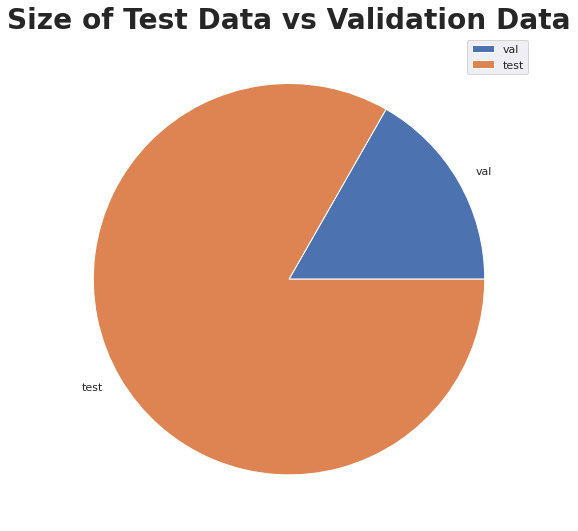

In [4]:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot()
plt.pie([val.shape[0], df.shape[0]], labels=["val", "test"])
plt.title("Size of Test Data vs Validation Data", fontsize=28, fontweight="bold")
ax.legend()
plt.show()

## Bar Chart of Relative Label Frequency and Imbalance 

These charts show the relative balence of label frequencies across the dataset. There is quite a large variation in number of examples between the labels which may certainly pose challenging to our model for the categories that are underrepresented. We also added in the test/val split to get a sense of any imbalances there, but it appears to be evenly distributed enough.

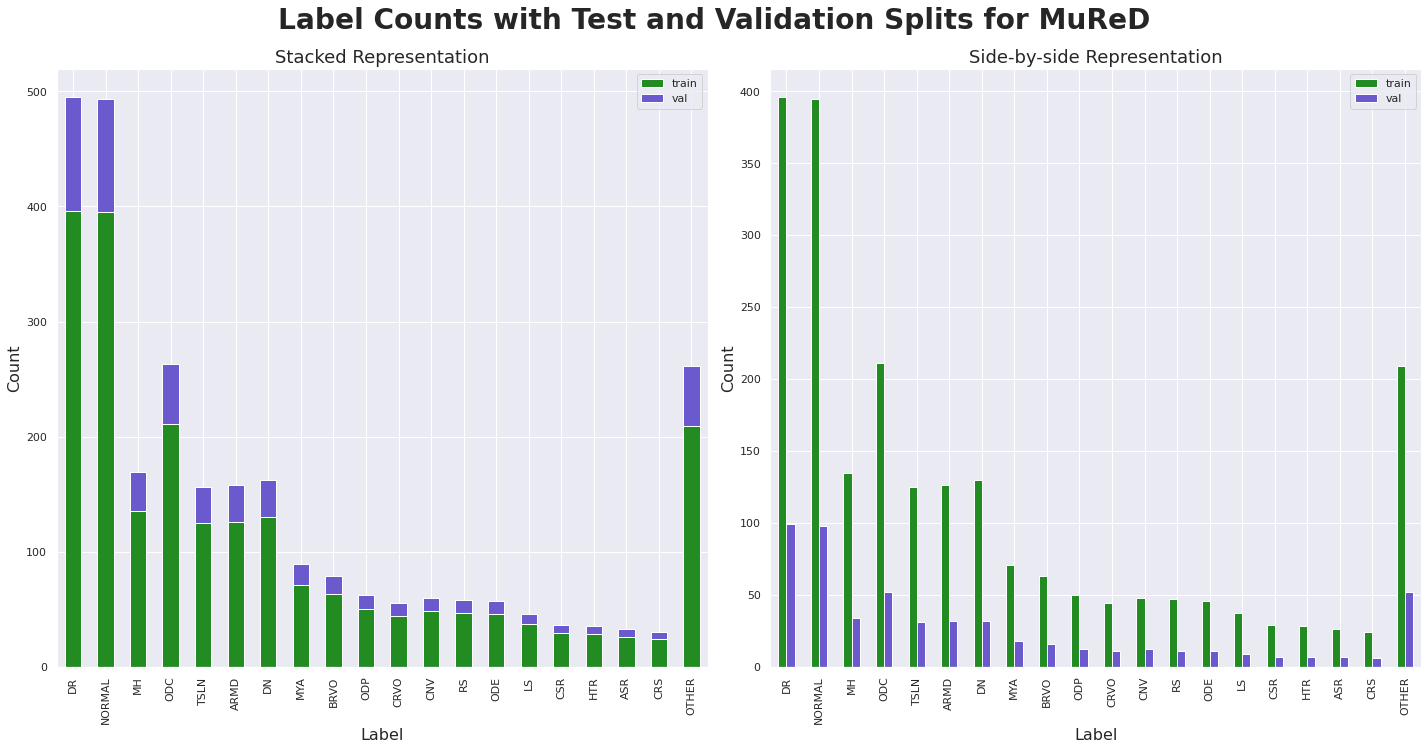

In [5]:
# bar chart of condition freq
label_counts = pd.concat([train.loc[:, train.columns != "ID"].sum(axis=0), val.loc[:, val.columns != "ID"].sum(axis=0)], axis=1, keys=["train", "val"])

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

label_counts.plot.bar(stacked=True, ax=axes[0], color=["forestgreen", "slateblue"])
axes[0].set_title("Stacked Representation", fontsize=18)
axes[0].set_xlabel("Label", fontsize=16)
axes[0].set_ylabel("Count", fontsize=16)
axes[0].legend()

label_counts.plot.bar(ax=axes[1], color=["forestgreen", "slateblue"])
axes[1].set_title("Side-by-side Representation", fontsize=18)
axes[1].set_xlabel("Label", fontsize=16)
axes[1].set_ylabel("Count", fontsize=16)
axes[1].legend()
plt.suptitle("Label Counts with Test and Validation Splits for MuReD", fontsize=28, fontweight="bold", y=1.04)
plt.tight_layout()
plt.show()

## Combinations of Multiple Labels


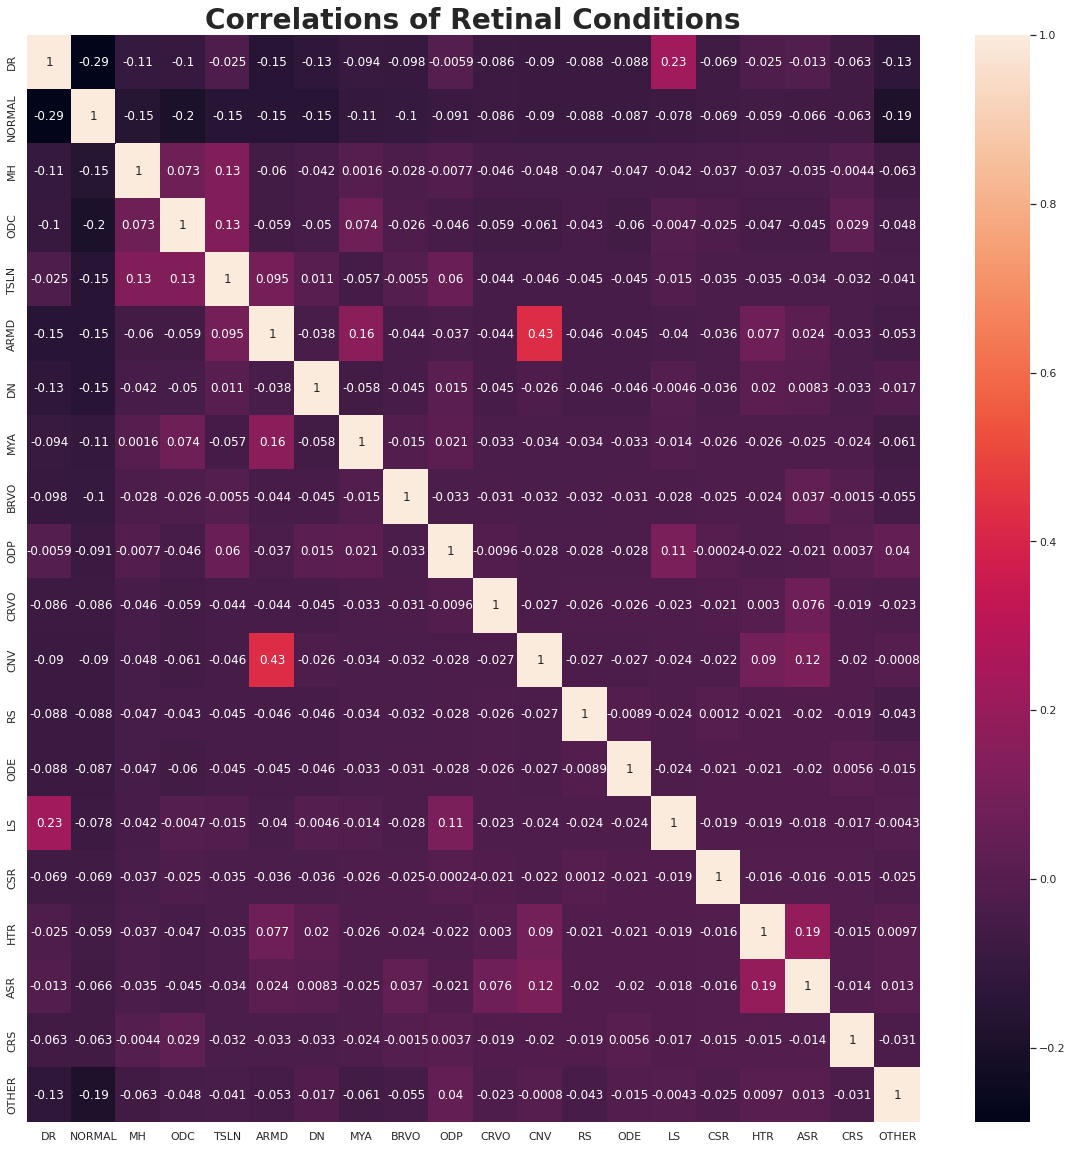

In [6]:
# Calculate the correlations and display a heatmap; this may be useful in looking at which diseases occur together
plt.figure(figsize=(20,20))
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.title("Correlations of Retinal Conditions", fontsize=28, fontweight="bold")
plt.show()

Here we have the correlations of each eye condition. A good sanity check is that the normal column is dark for every other eye condition, meaning that the data is correctly labeled. This heatmap also provides some intuition as to what conditions we will see in conjunction with one another. Since previous work has not done well with classifying multiple retinal diseases, if our model is having trouble with the same diseases that are highly correlated like Choroidal Neovascularization and Age-Related Macular Degeneration we know where to check first. We can then go in and look at which disease the model is biased towards and modify from there. Unsurprisingly, most conditions do not correlate in co-occurrence. The cases where that does happen should be of special interest. More research into these cases should be conducted so we can form possible explanations.

In [7]:
sums = df[df["NORMAL"]==0].sum(axis=1).astype(int)
sum_d = {}
for s in sums:
  if s in sum_d:
    sum_d[s] += 1
  else:
    sum_d[s] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Frequency')

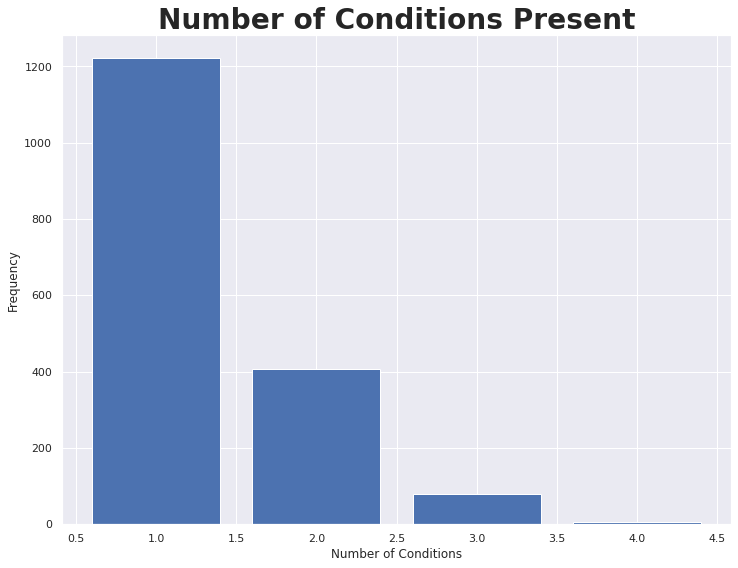

In [8]:
plt.bar(sum_d.keys(), sum_d.values())
plt.title("Number of Conditions Present", fontsize=28, fontweight="bold")
plt.xlabel("Number of Conditions")
plt.ylabel("Frequency")

Here are the frequencies of the number of retinal diseases present in our dataset not including normal eyes. For the most part, a diseased eye will only represent one disease. 

In [9]:
# Now get a dictionary of each combination of diseases:
d = {}
for i in range(len(df)):
  string = ""
  for (columnName, columnData) in df.iloc[i,:].iteritems():
    if columnData==1:
      if string != "":
        string += f", {columnName}"
      else:
        string += columnName
  if "," in string:
    if string in d:
      d[string] += 1
    else: 
      d[string] = 1

In [10]:
top10s = sorted(d, key=d.get, reverse=True)[:10]
top10values = [d[t] for t in top10s]

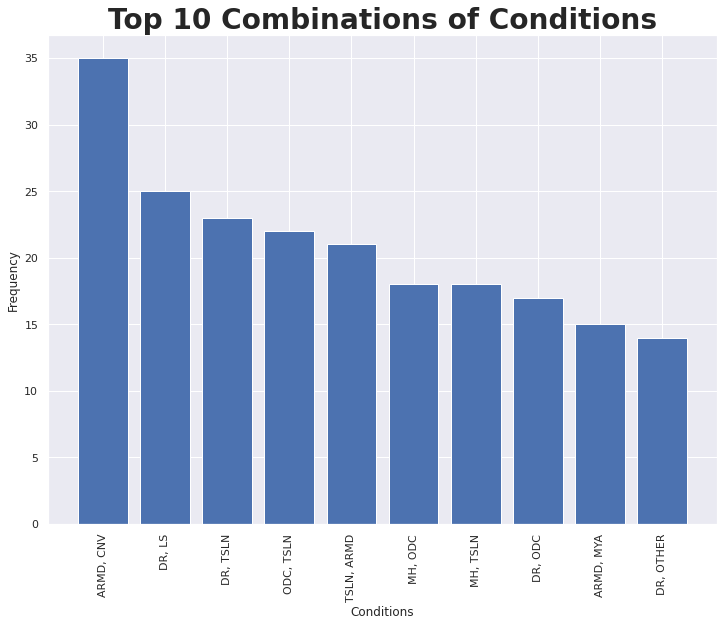

In [11]:
plt.bar(top10s, top10values)
plt.xticks(rotation='vertical')
plt.xlabel('Conditions')
plt.ylabel('Frequency')
plt.title('Top 10 Combinations of Conditions', fontsize=28, fontweight="bold")
plt.show()

Here we can see the top 10 combinations of conditions among our dataset. These are represented as well in our heatmap of correlations. <b> I don't know what else to put here</b>

## Image Sizes

This chart shows the various image sizes represented in our dataset. This will inform our model since we will need to homogenize our inputs later on. We will likely downsample the larger images while characterizing any lost information by that process.

Text(0, 0.5, 'Image Height (pixels)')

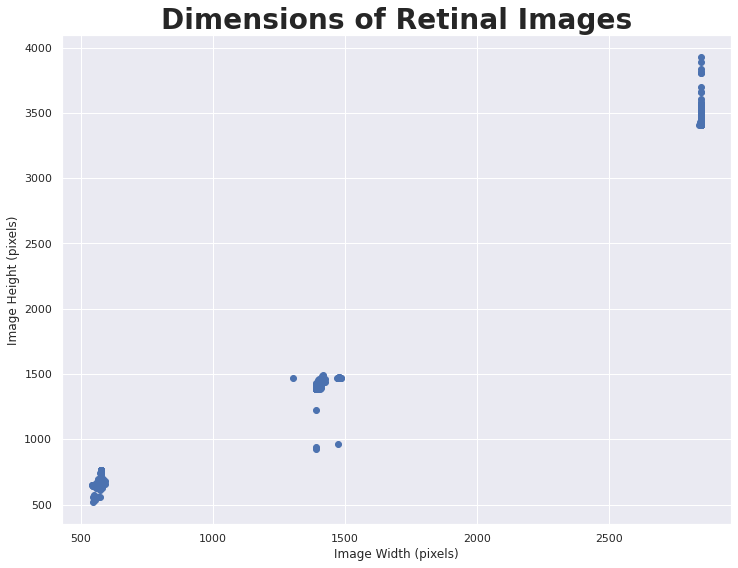

In [12]:
heights = []
widths = []

def get_dims(file):
    """Returns dimensions of an RBG image."""
    im = Image.open(file)
    arr = np.array(im)
    h,w,d = arr.shape
    im.close()
    return h,w
  

directory = "/content/drive/Shareddrives/COSC 189/COSC 189 Project/Raw Data/images"


# iterate through images and get their dimensions
# for row in train['ID']: <-- doesn't work because some images are 'mislabeled' in csv file
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    
    # continue if path is a folder
    if not os.path.isfile(f):
        continue

    h,w = get_dims(f)
    heights.append(h)
    widths.append(w)

# create a dataframe out of lists
dims_df = pd.DataFrame(
    {'width': widths,
     'height': heights
    })

# visualization
plt.scatter(heights, widths)
plt.title("Dimensions of Retinal Images", fontsize=28, fontweight="bold")
plt.xlabel("Image Width (pixels)")
plt.ylabel("Image Height (pixels)")

## Image Samples

Here well grab samples of each category in order to get a sense of how they vary. This is valuable for gaining an intuitive sense of which visual characteristics of our images are predictive of eye conditions as well as the kinds of differences that our model will need to detect. We don't have the training to interpret these at this stage, but it's good to get familiar with our data.


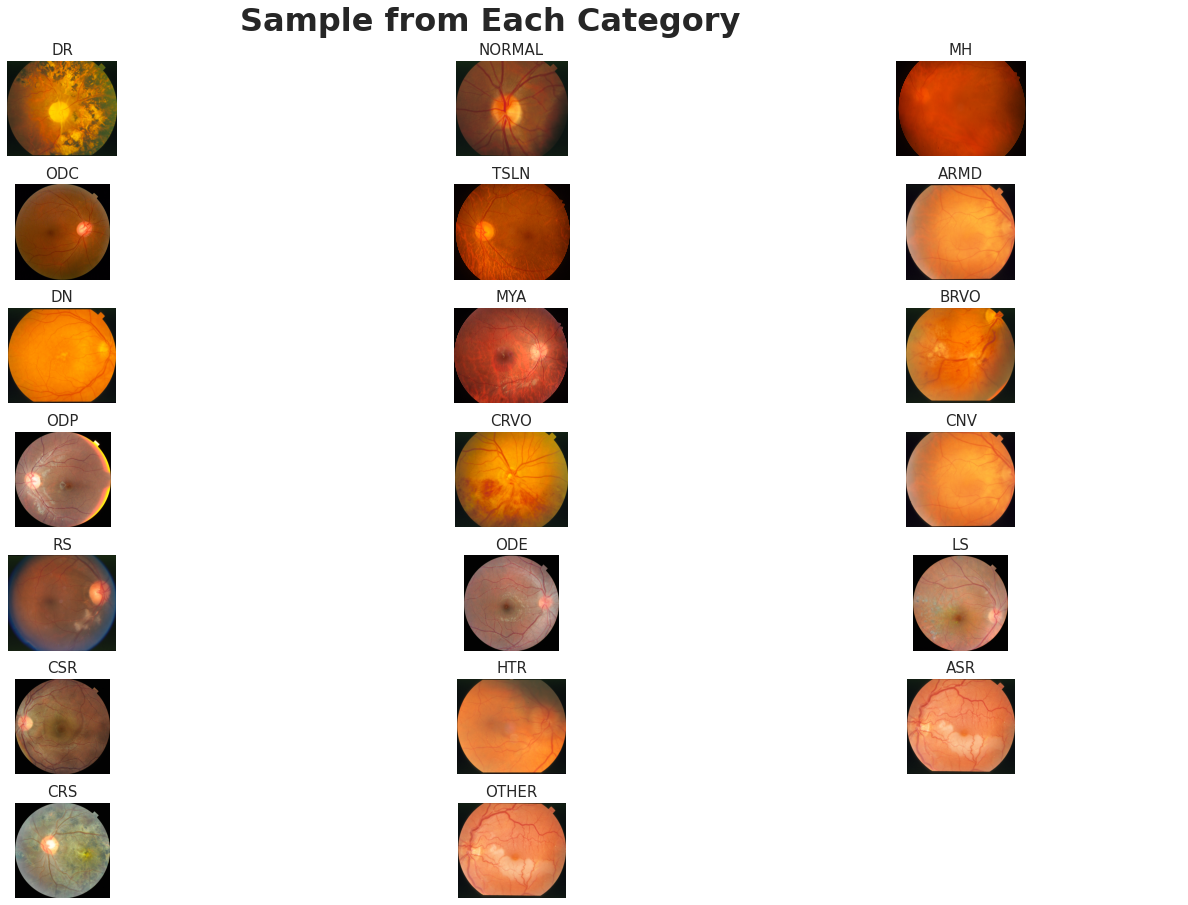

In [13]:
cols = ['DR', 'NORMAL', 'MH', 'ODC', 'TSLN', 'ARMD', 'DN', 'MYA', 'BRVO',
        'ODP', 'CRVO', 'CNV', 'RS', 'ODE', 'LS', 'CSR', 'HTR', 'ASR', 'CRS',
        'OTHER']
        
image_sample = [df[df[cols[i]] == 1]["ID"].iloc[-1] for i in range(len(cols))]
image_sample = [j + ".tif" if "aria" in j else j + ".png" for j in image_sample]
image_sample[9] = "57.png"
image_sample[13] = "56.png"
image_sample[14] = "59.png"
image_sample[18] = "31.png"

fig, axes = plt.subplots(7, 3, figsize=(20, 15))

for i in range(7):
    for j in range(3):
        if i == 6 and j == 2:
            break
        f = os.path.join(directory, image_sample[(i * 3) + j])
        axes[i, j].axis("Off")
        img = mpimg.imread(f)
        axes[i, j].imshow(img)
        axes[i, j].set_title(cols[(i * 3) + j], fontsize=15, loc="center")

axes[-1, -1].axis('off')
fig.suptitle("Sample from Each Category", fontsize=32, fontweight="bold", y=0.95)
fig.subplots_adjust(left=0.05, right=0.98, top=0.9, hspace=0.30, wspace=0.02)
plt.show()


## Average Images

Unsurprisingly, the average for the whole dataset is not terribly descriptive. Most of the features are not visible. Comparatively, the averages for given conditions are somewhat different from each other. some averages are quite blury, while others are more textured with visible arteries. This is quite promising since it indicates that there could be broad differences that would be "low hanging fruit" for our model to exploit. It also serves as a sanity check yet again.

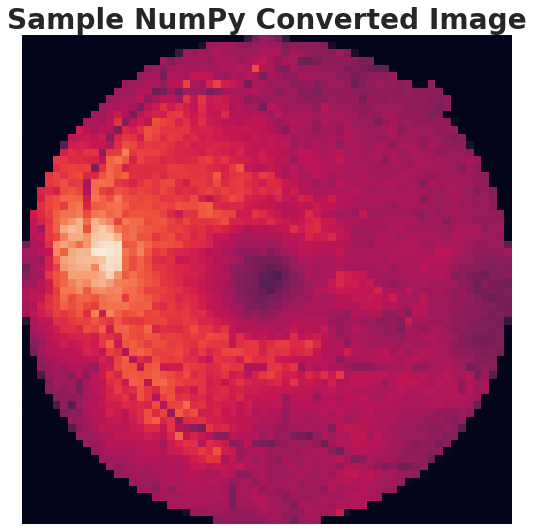

In [14]:
# making n X m matrix
def img2np(path, list_of_filename, size=(64, 64)):
    # iterating through each file
    for fn in list_of_filename:
        fp = path + "/" + fn
        current_image = image.load_img(fp, target_size = size, 
                                       color_mode = "grayscale")
        # covert image to a matrix
        img_ts = image.img_to_array(current_image)
        # turn that into a vector / 1D array
        img_ts = [img_ts.ravel()]
        try:
            # concatenate different images
            full_mat = np.concatenate((full_mat, img_ts))
        except UnboundLocalError: 
            # if not assigned yet, assign one
            full_mat = img_ts
    return full_mat


directory = "/content/drive/Shareddrives/COSC 189/COSC 189 Project/Raw Data/images"
# these will be the file names for the whole dataset
all_files = []
# this variable will contain the file names in buckets for each label
cat_files = {"DR": [], "NORMAL": [], "MH": [], "ODC": [], "TSLN": [], "ARMD": [], 
             "DN": [], "MYA": [], "BRVO": [], "ODP": [], "CRVO": [], "CNV": [], 
             "RS": [], "ODE": [], "LS": [], "CSR": [], "HTR": [], "ASR": [], 
             "CRS": [], "OTHER": [], "NO_LABEL": []}
# and this will hold the numpy values in buckets for each label
catnp = cat_files

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    
    if not os.path.isfile(f):
        continue

    curr_row = df.loc[df["ID"] == filename[:-4]]
    curr_row = curr_row.apply(lambda row: row[row == 1].index.tolist(), axis=1)
    if curr_row.size > 0:
        for label in curr_row.iloc[0]:
            cat_files[label].append(filename)
    else:
        cat_files["NO_LABEL"].append(filename)

    all_files.append(filename)

all_images = img2np(directory, all_files)

for key in catnp:
    catnp[key] = img2np(directory, cat_files[key])

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot()
plt.imshow(catnp["NORMAL"][0].reshape(64, 64))
plt.title("Sample NumPy Converted Image", fontsize=28, fontweight="bold")
plt.axis("off")
plt.show()


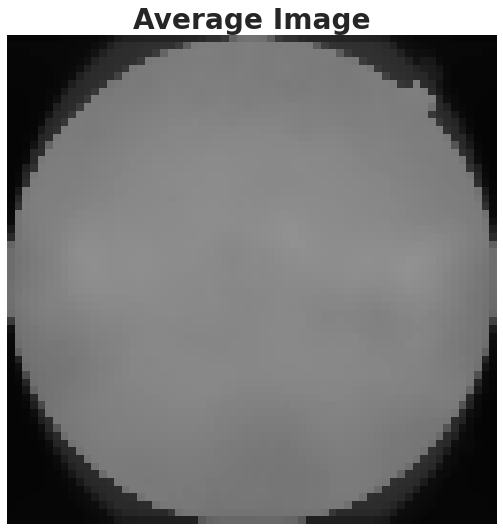

In [15]:
# show the average sample for the whole dataset
def find_mean_img(full_mat, title, size = (64, 64)):
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0)
    # reshape it back to a matrix
    mean_img = mean_img.reshape(size)
    plt.imshow(mean_img, vmin=0, vmax=255, cmap='Greys_r')
    plt.title(f'Average {title}', fontsize=28, fontweight="bold")
    plt.axis('off')
    plt.show()
    return mean_img

all_mean = find_mean_img(all_images, "Image")

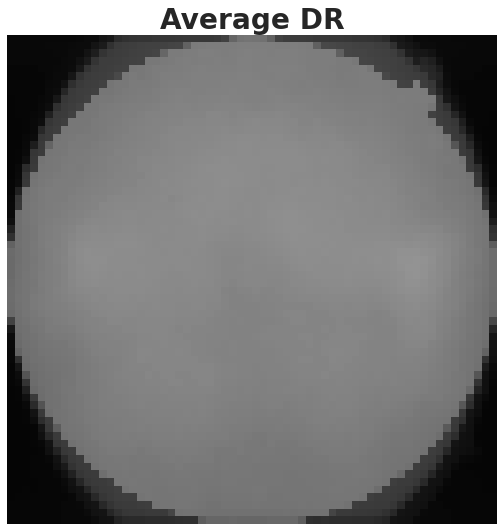

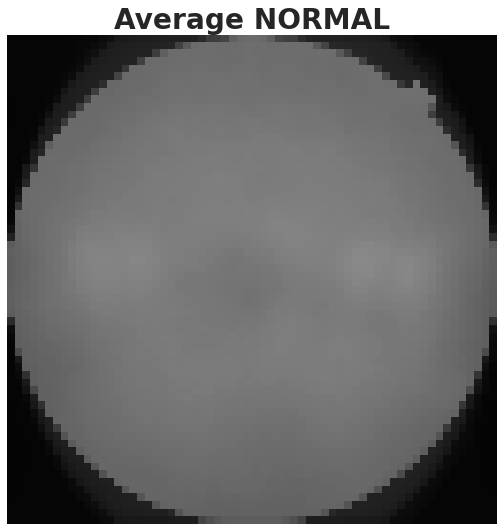

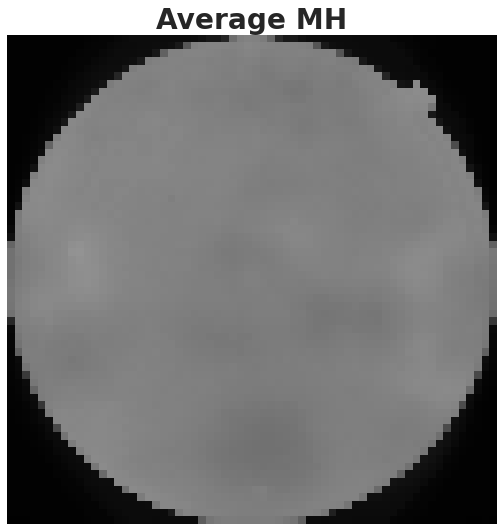

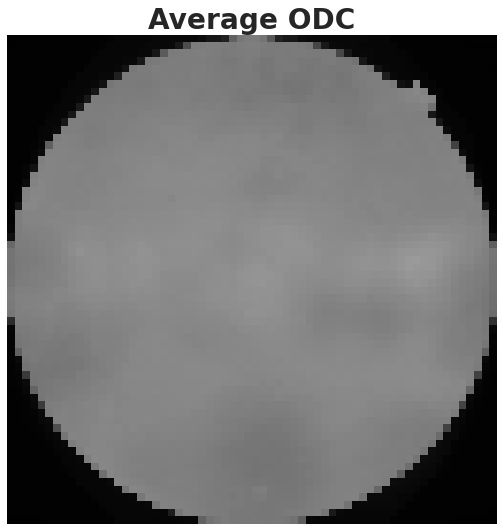

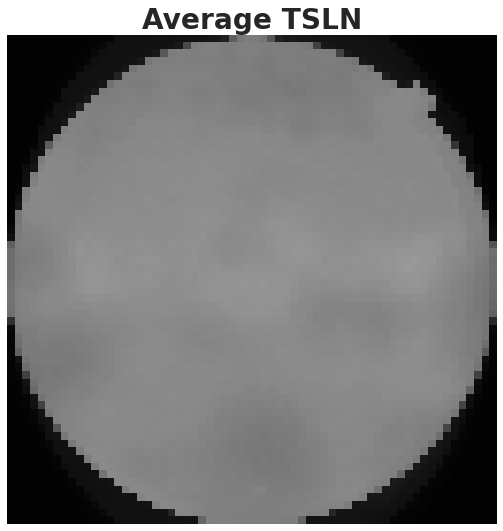

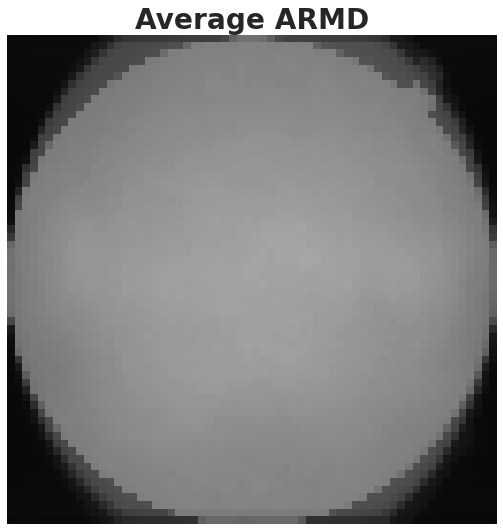

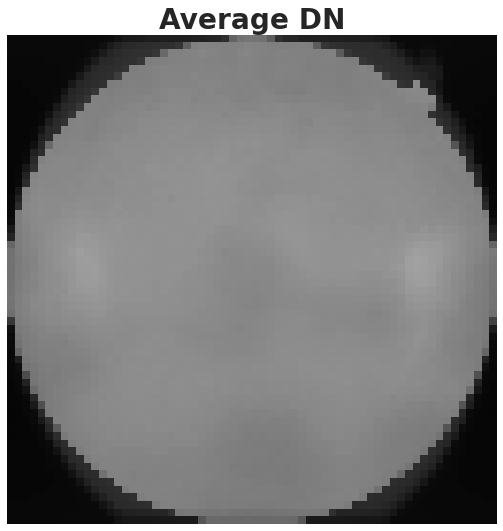

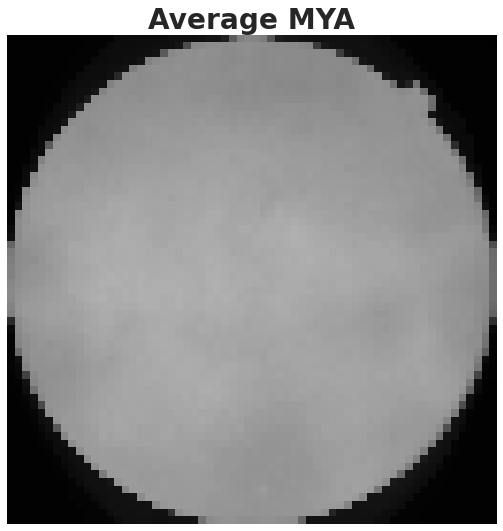

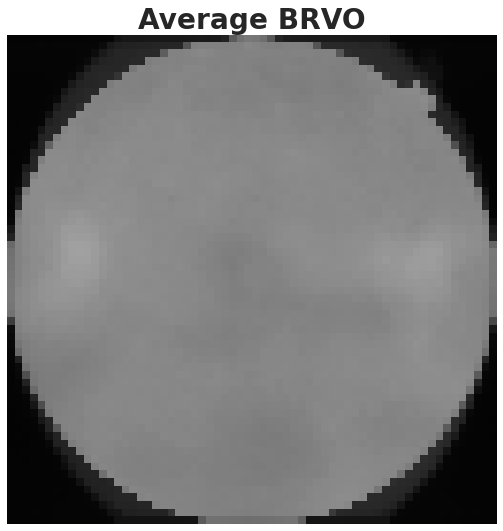

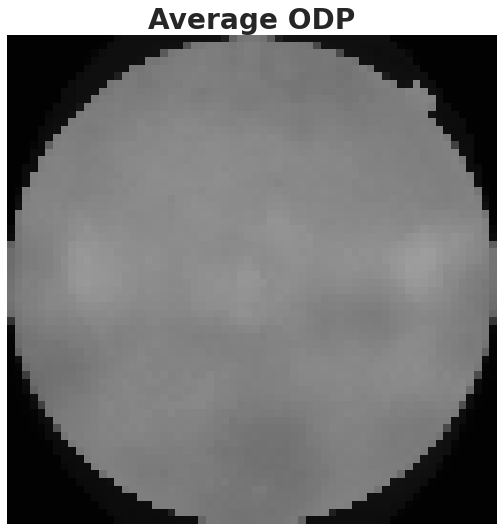

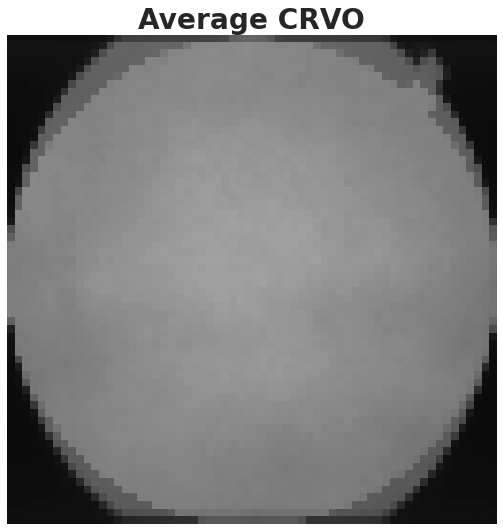

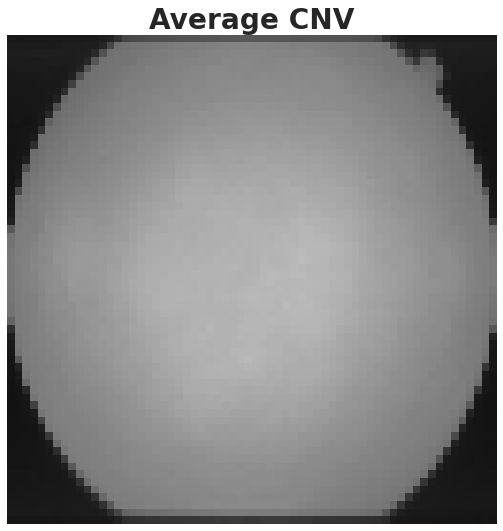

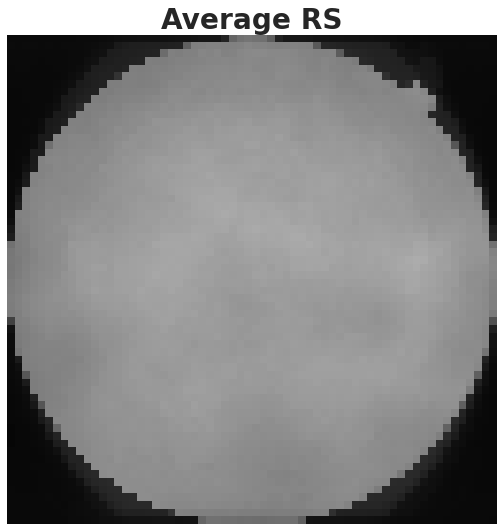

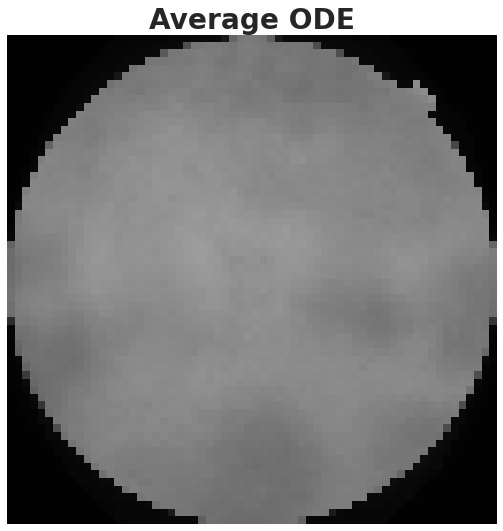

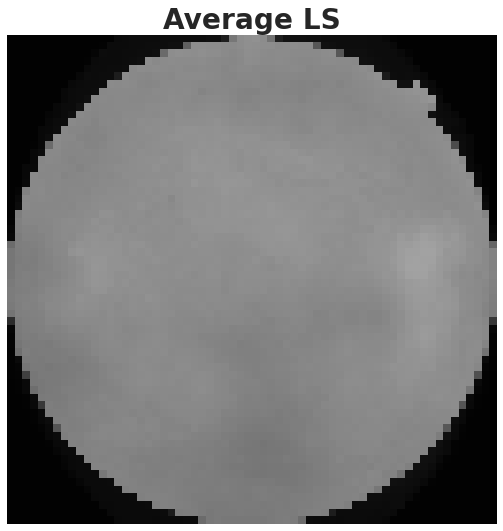

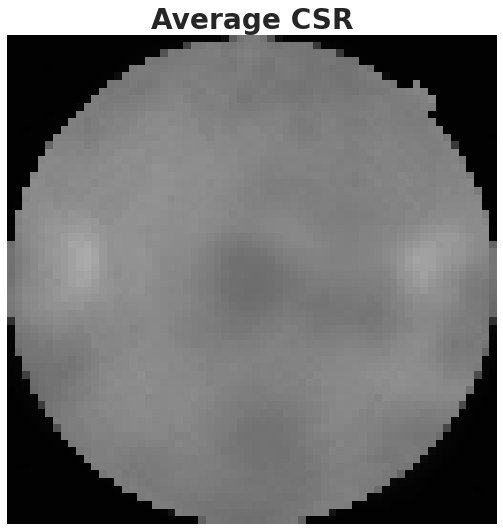

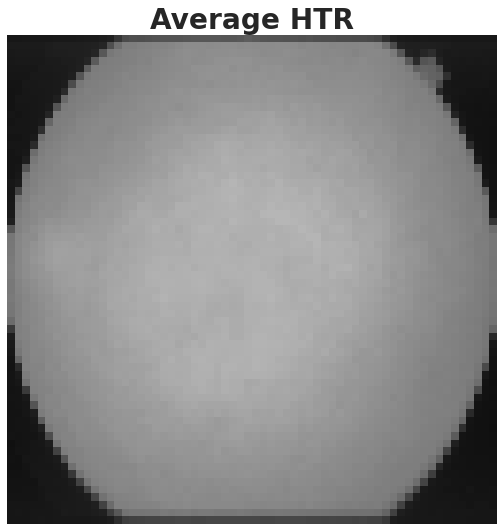

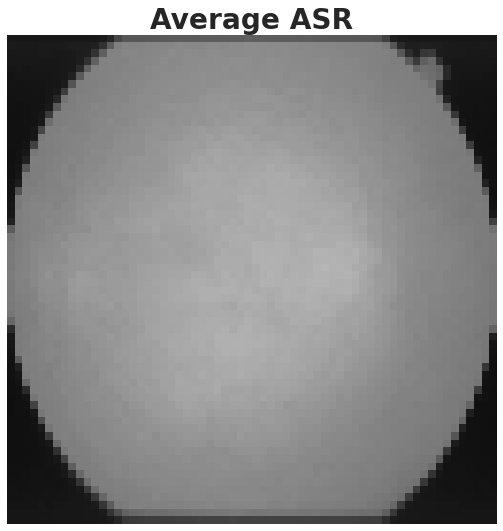

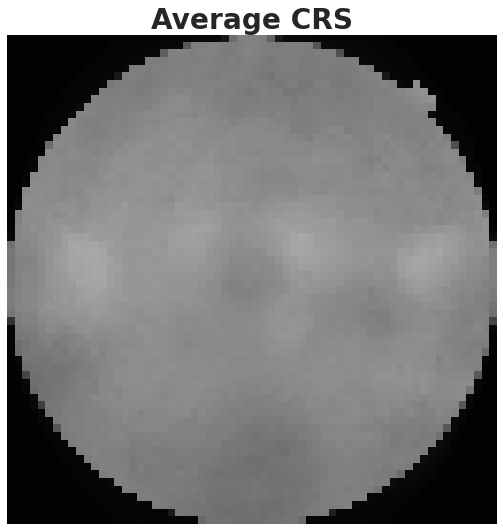

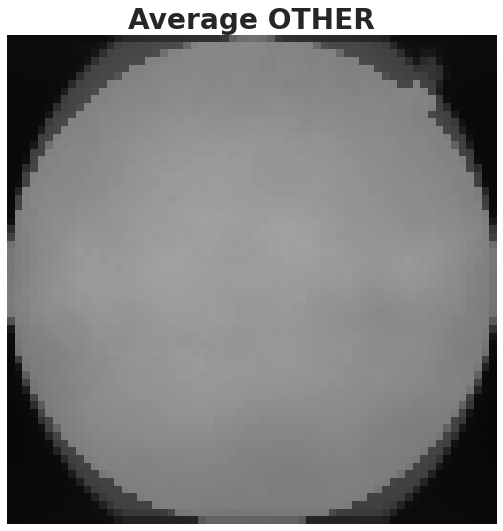

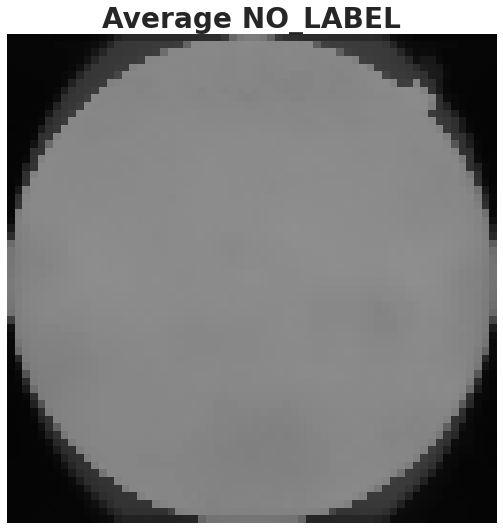

In [16]:
# show the average sample for each label
means = {"DR": [], "NORMAL": [], "MH": [], "ODC": [], "TSLN": [], "ARMD": [], 
         "DN": [], "MYA": [], "BRVO": [], "ODP": [], "CRVO": [], "CNV": [], 
         "RS": [], "ODE": [], "LS": [], "CSR": [], "HTR": [], "ASR": [], 
         "CRS": [], "OTHER": [], "NO_LABEL": []}
for key in means:
    means[key] = find_mean_img(catnp[key], key)


## Contrast Between Averages

This result is quite interesting, since it demonstrates the differences between our averages in a concrete way. Seeing the horizontal and vertical patterns as well as labels that stand out in general is quite insightful. For example, we can see that MYA label (myopia) varies a lot from the other conditions. This makes sense, since it's an issue with the focusing of the lens and the retna is not effected. We can also see that important regious tend to be more different for some conditions. For example, the CSR (central serous retinopathy) data shows high variations in the fovea centralis region. This could be due to the fluid buildup being particularly extreme in that region of the retina. 

We will continue to study this chart! 

In [17]:
fig, axes = plt.subplots(21, 21, figsize=(20, 20), sharey=True)

for i, mean1 in enumerate(means):
    for j, mean2 in enumerate(means):
        contrast_mean = means[mean1] - means[mean2]
        axes[i, j].imshow(contrast_mean, cmap='bwr')
        axes[i, j].axis("Off")
        if i == 0:
            axes[i, j].set_title(mean2, fontsize=16, loc="center")
        if j == 0:
            axes[i, j].text(0.25, 0.5, mean1, fontsize=16, ha="right", va="center", 
                            rotation="vertical", transform=axes[i, j].transAxes)

fig.suptitle("Cross Mean Differences for Each Category", fontsize=32, fontweight="bold", y=0.95)
fig.subplots_adjust(left=0.10, right=0.95, top=0.9, hspace=0, wspace=0)
plt.show()


Output hidden; open in https://colab.research.google.com to view.

## Conclusion

Overall, this dataset seems fairly organized and we will not have to do a lot of cleaning on it. That being said, one of the main remaining issues appears to be references to non-existent images withing the `.csv` files. It will not be challenging to clean those out though. Other than that, we can continue to explore our dataset, learn about the topic, and then move to preparation for modeling and predicting it.

## References

Links to sources and reference articles



*   https://ieee-dataport.org/documents/multi-label-retinal-disease-mured-dataset
*   https://arxiv.org/abs/2207.02335
*   https://medium.com/geekculture/eda-for-image-classification-dcada9f2567a
*   https://towardsdatascience.com/exploratory-data-analysis-ideas-for-image-classification-d3fc6bbfb2d2

